In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data=pd.read_csv("delivery_time.CSV")

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
data=data.rename(columns={'Delivery Time':'dt', 'Sorting Time':'st'})

In [9]:
data

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


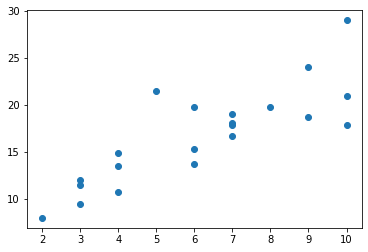

In [10]:
plt.scatter(data.st, data.dt)                    #scatter plot of two variables

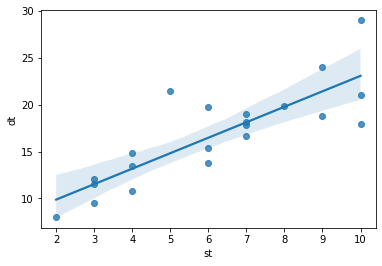

In [11]:
sns.regplot(x="st", y="dt", data=data);

C:\Users\parvin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

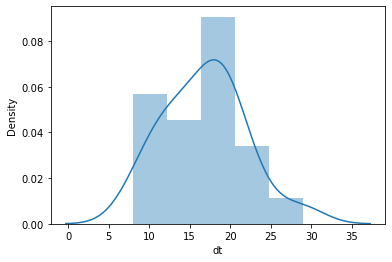

In [15]:
sns.distplot(data['dt'])

C:\Users\parvin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

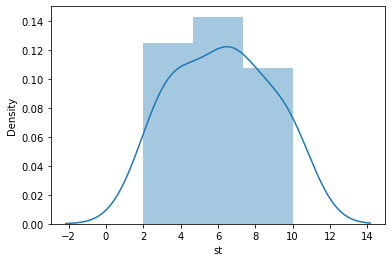

In [16]:
sns.distplot(data['st'])

In [ ]:
data.corr()

# Outlier Detection

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee3067d2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee3067d880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee30660f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee3067de20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee3068c130>],
 'means': []}

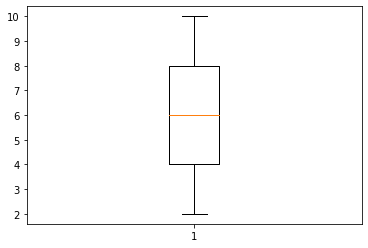

In [17]:
plt.boxplot(data['st'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee306d9ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee306e8280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee306d9af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee306e8820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee306e8af0>],
 'means': []}

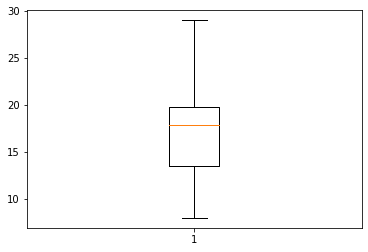

In [18]:
plt.boxplot(data['dt'])

# Fitting a Linear regression model

# Find by No Transformation

In [19]:
import statsmodels.formula.api as smf

In [20]:
model=smf.ols("dt~st",data=data).fit()

In [21]:
model.summary()                       #R-squared value is very small

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        12:23:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Coefficients

model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [23]:
# t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [24]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [25]:
# sqrt vaqlues
np.sqrt(model.rsquared)

0.8259972607955326

# Log Transformation

In [26]:
model1=smf.ols("dt~np.log(st)",data=data).fit()

In [27]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        12:25:21   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exponintial Trainsformation

In [28]:
model2=smf.ols("np.log(dt)~st",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                        12:25:29   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Coefficients

model2.params

Intercept    2.121372
st           0.105552
dtype: float64

In [32]:
# t and p-Values
print(model2.tvalues, '\n', model2.pvalues)   

Intercept    20.601357
st            6.836088
dtype: float64 
 Intercept    1.857343e-14
st           1.592708e-06
dtype: float64


In [33]:
# R squared values
(model2.rsquared,model2.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

In [34]:
# sqrt vaqlues
np.sqrt(model2.rsquared)

0.8431772637224149

In [35]:
pred_log = model2.predict(pd.DataFrame(data['st']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [36]:
pred=np.exp(pred_log)  # as we have used log(dt) in preparing model so we need to convert it back
pred

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [37]:
pred.corr(data.dt)

0.8085780108289259

Text(0, 0.5, 'DT')

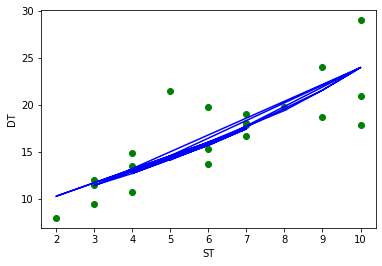

In [38]:
plt.scatter(x=data['st'],y=data['dt'],color='green');plt.plot(data.st,np.exp(pred_log),color='blue');plt.xlabel('ST');plt.ylabel('DT')


In [ ]:
resid_ = pred-data.dt
resid_

In [ ]:
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set
# Predicted vs actual values
plt.scatter(x=pred,y=data.dt);plt.xlabel("Predicted");plt.ylabel("Actual")


# Polynomial Transformation

In [29]:
model3=smf.ols("dt~st+st^2",data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     20.84
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           2.07e-05
Time:                        12:25:53   Log-Likelihood:                -50.811
No. Observations:                  21   AIC:                             107.6
Df Residuals:                      18   BIC:                             110.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7837      1.736      3.909      0.001       3.137      10.430
st             1.3190      0.424      3.109      0.006       0.428       2.210
st ^ 2         0.3334      0.340      0.981      0.340      -0.381       1.048
==============================================================================
Omnibus:                        3.228   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.811
Skew:                           0.703   Prob(JB):                        0.404
Kurtosis:                       3.301   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cubic Transformation

In [30]:
model4=smf.ols("dt~st+st^2+st^3",data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     13.62
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           8.85e-05
Time:                        12:25:57   Log-Likelihood:                -50.533
No. Observations:                  21   AIC:                             109.1
Df Residuals:                      17   BIC:                             113.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7338      1.764      3.817      0.001       3.012      10.456
st             1.3162      0.431      3.055      0.007       0.407       2.225
st ^ 2         0.7913      0.762      1.039      0.313      -0.815       2.398
st ^ 3        -0.4419      0.655     -0.675      0.509      -1.824       0.940
==============================================================================
Omnibus:                        4.638   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                2.707
Skew:                           0.828   Prob(JB):                        0.258
Kurtosis:                       3.595   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exponential model gives better result


In [ ]:
'''
so for model prediction we used exponential model
'''

In [ ]:
newdata=pd.Series([12,15])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['st'])

In [ ]:
data_pred

In [ ]:
model2.predict(data_pred)